# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import weatherapi_key 
print(weatherapi_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (" ./output_data_file/cities.csv")


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

9be9758c9133454f8928ba641ed754c5


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Replace space with %30 to create url
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
from api_key import weatherapi_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherapi_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=rikitea
Processing Record 2 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=jamestown
Processing Record 3 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=atuona
Processing Record 4 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=ushuaia
Processing Record 5 | Belaya Gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=belaya%20gora
Processing Record 6 | Sydney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=sydney
Processing Record 7 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 57 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=barrow
Processing Record 58 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=bredasdorp
Processing Record 59 | Chukhloma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=chukhloma
City not found. Skipping...
Processing Record 60 | Taganak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=taganak
Processing Record 61 | Kasongo-Lunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kasongo-lunda
Processing Record 62 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=aasiaat
Processing Record 63 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 113 | Kargasok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kargasok
Processing Record 114 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=sitka
Processing Record 115 | Bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=bundaberg
Processing Record 116 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=lebu
Processing Record 117 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=dikson
City not found. Skipping...
Processing Record 118 | Cheney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=cheney
City not found. Skipping...
Processing Record 119 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 167 | Port Hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=port%20hawkesbury
Processing Record 168 | Krasnoyarskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=krasnoyarskaya
City not found. Skipping...
City not found. Skipping...
Processing Record 169 | Bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=bitung
Processing Record 170 | Ankazoabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=ankazoabo
Processing Record 171 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=lagoa
Processing Record 172 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=shingu
Processing Record 173 | Namatanai
http://api.openweatherma

Processing Record 221 | Kalanguy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kalanguy
Processing Record 222 | Kaura Namoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kaura%20namoda
Processing Record 223 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=vanimo
Processing Record 224 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=palana
Processing Record 225 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=ancud
Processing Record 226 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=jumla
City not found. Skipping...
Processing Record 227 | Turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c91334

City not found. Skipping...
Processing Record 277 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=tiksi
Processing Record 278 | Saint-Denis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=saint-denis
Processing Record 279 | Horqueta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=horqueta
Processing Record 280 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=port%20hedland
Processing Record 281 | Tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=tual
Processing Record 282 | Leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=leshukonskoye
Processing Record 283 | Madinat Sittah Uktubar
http://api.openweathermap.org/data/2.5/weat

City not found. Skipping...
Processing Record 332 | Kabansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kabansk
Processing Record 333 | Villa Union
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=villa%20union
Processing Record 334 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=college
Processing Record 335 | Cuauhtemoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=cuauhtemoc
Processing Record 336 | Laem Sing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=laem%20sing
Processing Record 337 | Guiglo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=guiglo
Processing Record 338 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 388 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=bud
Processing Record 389 | Gladstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=gladstone
Processing Record 390 | Doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=doha
Processing Record 391 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=port%20hardy
Processing Record 392 | Bangui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=bangui
Processing Record 393 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=dingle
Processing Record 394 | Krasnyy Yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=krasnyy%2

Processing Record 444 | Gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=gizo
Processing Record 445 | Tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=tigil
Processing Record 446 | Novooleksiyivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=novooleksiyivka
Processing Record 447 | Kotagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=kotagiri
Processing Record 448 | Samdrup Jongkhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=samdrup%20jongkhar
Processing Record 449 | Erdenet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=erdenet
City not found. Skipping...
Processing Record 450 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 499 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=denpasar
City not found. Skipping...
Processing Record 500 | Tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=tevaitoa
Processing Record 501 | Atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=atherton
Processing Record 502 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=ahipara
Processing Record 503 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=emba
Processing Record 504 | Mantua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=mantua
Processing Record 505 | La Romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c913345

Processing Record 555 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=saint-georges
Processing Record 556 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=port%20keats
Processing Record 557 | Tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=tabas
Processing Record 558 | Katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=katherine
Processing Record 559 | Oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=oktyabrskoye
Processing Record 560 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9be9758c9133454f8928ba641ed754c5&q=marzuq


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv("Citipy.CSV")

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,67,PF,1564169534,81,-23.12,-134.97,74.14,13.27
1,Jamestown,59,AU,1564169536,90,-33.21,138.60,43.90,2.44
2,Atuona,0,PF,1564169537,76,-9.80,-139.03,79.90,11.99
3,Ushuaia,75,AR,1564169538,60,-54.81,-68.31,42.80,34.45
4,Belaya Gora,42,RU,1564169540,54,68.54,146.19,47.50,9.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

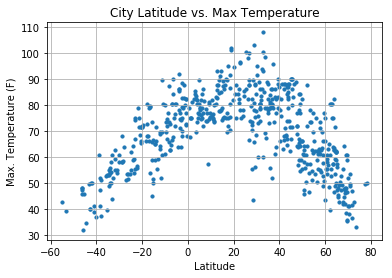

In [27]:
# Build a scatter plot for City Latitude Vs. Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plotted figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

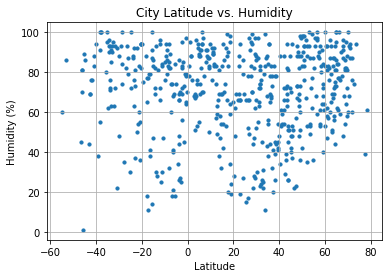

In [29]:
# Build a scatter plot for City Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

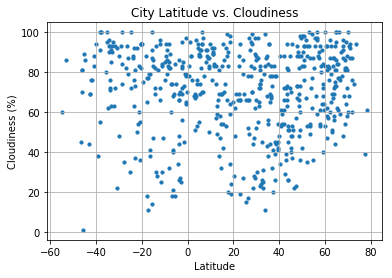

In [30]:
# Build a scatter plot for City Latitude VS. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

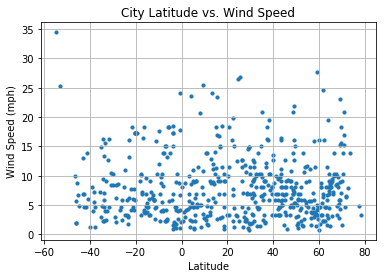

In [31]:
# Build a scatter plot for City Latitude Vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [ ]:
# THREE OBSERVABLE TRENDS

1. The Max Temperature Vs City Latitude scatter Plot shows that the temperatures are higher more towards the equator.

2. The Humidity and Cloudiness scatter plot shows consistent pattern across the latitudes.

3. The Wind Speed plot shows increases as the scatter moves further down from the equator.

